In [77]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [32]:
features_path = '../data/processed/balance_16k/preprocessing/x_train.csv'
labels_path = '../data/processed/balance_16k/preprocessing/y_train.csv'

In [33]:
features = pd.read_csv(features_path).values
labels = pd.read_csv(labels_path).values

In [34]:
features_normalized = normalize(features, norm='l2', axis=1)

In [35]:
similarity_matrix = cosine_similarity(features_normalized)

C:\Users\pradh\anaconda3\envs\venv\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [36]:
similarity_matrix.shape

(16303, 16303)

In [37]:
print("Min value in features:", features.min())
print("Max value in features:", features.max())

# You can also check the standard deviation and mean
print("Mean value in features:", features.mean())
print("Standard deviation in features:", features.std())

Min value in features: -27083595
Max value in features: 24617084
Mean value in features: -5680.2196367300085
Standard deviation in features: 417896.1237213523


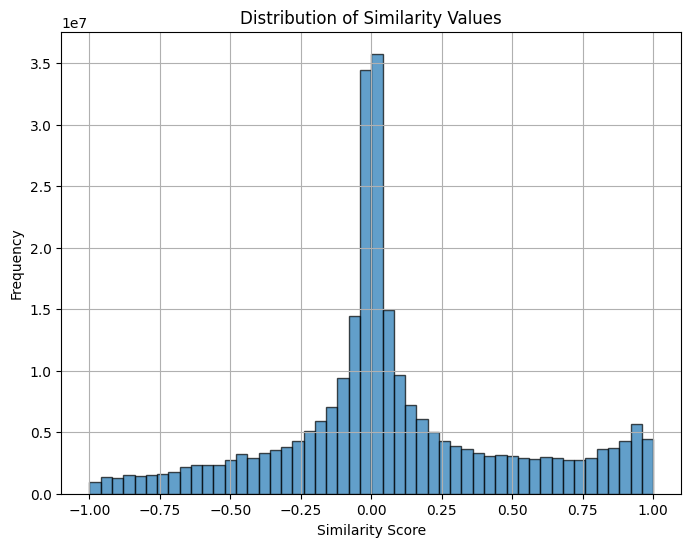

In [39]:
similarity_values = similarity_matrix.flatten()

# Plot a histogram of the similarity values
plt.figure(figsize=(8, 6))
plt.hist(similarity_values, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Similarity Values')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [62]:
percentile_60 = np.percentile(similarity_values, 60)
percentile_65 = np.percentile(similarity_values, 65)
percentile_70 = np.percentile(similarity_values, 70)
percentile_75 = np.percentile(similarity_values, 75)
percentile_80 = np.percentile(similarity_values, 80)
percentile_85 = np.percentile(similarity_values, 85)
percentile_90 = np.percentile(similarity_values, 90)


In [67]:
threshold = percentile_65
adjacency_matrix = (similarity_matrix >= threshold).astype(int)

np.fill_diagonal(adjacency_matrix, 0)

In [68]:
graph = nx.from_numpy_array(adjacency_matrix)

In [69]:
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()

num_edges, num_nodes

(46504715, 16303)

In [70]:
isolated_nodes = list(nx.isolates(graph))
print(f"Number of isolated nodes: {len(isolated_nodes)}")


Number of isolated nodes: 105


In [71]:
for i, feat in enumerate(features):
    graph.nodes[i]['features'] = feat

In [72]:
for i, label in enumerate(labels):
    graph.nodes[i]['label'] = label

In [73]:
print(graph.nodes[0])

{'features': array([1009, 1051, 1083, ..., -733, -767, -764], dtype=int64), 'label': array(['Pn'], dtype=object)}


In [74]:
largest_cc = max(nx.connected_components(graph), key=len)

In [75]:
print(f"Size of the largest connected component: {len(largest_cc)}")

Size of the largest connected component: 16196


In [78]:
save_path = '../data/processed/balance_16k/model_input/graph_with_features_and_labels.gpickle'
pickle.dump(graph, open(save_path, 'wb'))


In [80]:
graph = pickle.load(open('../data/processed/balance_16k/model_input/graph_with_features_and_labels.gpickle', 'rb'))

In [81]:
print(graph.nodes[0])

{'features': array([1009, 1051, 1083, ..., -733, -767, -764], dtype=int64), 'label': array(['Pn'], dtype=object)}
